In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os

In [12]:
df = pd.read_csv("data/main.csv", header=1)

n=1000
N=3
DF=[]
for i in range(N):
    DF.append(df.iloc[(n+2)*i:(n+2)*i + n][:])

# plt.figure()
# for i in range(20):
#     sns.scatterplot(data=pd.read_csv(f"data_res/{i}.csv")[9800:9900:1], x='i', y='x', alpha=1, s=50)


# df
DF[2]

,time,x,y,z,x_,y_,z_
2004,0,0.63259,0.357588,0.284862,0.0159216,-0.019163,-0.0768415
2005,0.01,0.63275,0.357397,0.284094,0.0160716,-0.0192016,-0.0768943
2006,0.02,0.632911,0.357204,0.283324,0.0162243,-0.0192408,-0.0769477
2007,0.03,0.633074,0.357012,0.282555,0.0163798,-0.0192806,-0.0770019
2008,0.04,0.633239,0.356819,0.281784,0.0165381,-0.019321,-0.0770568
...,...,...,...,...,...,...,...
2999,9.95,881988,0.578194,0.136841,111648,-6648.35,1404.54
3000,9.96,883005,0.0946869,0.182216,111648,-6648.35,1404.54
3001,9.97,884021,0.61118,0.227591,111648,-6648.35,1404.54
3002,9.98,885038,0.127674,0.272965,111648,-6648.35,1404.54


<Axes: xlabel='time', ylabel='x'>

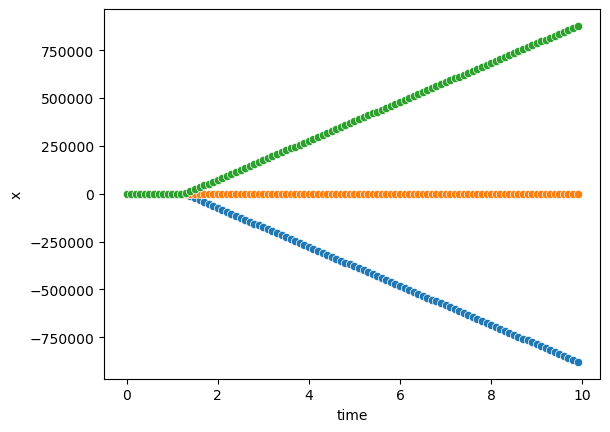

In [13]:


plt.figure()
DF[0]["time"] = DF[0]["time"].apply(float)
DF[0]["x"] = DF[0]["x"].apply(float)
sns.scatterplot(data=DF[0][::10], x="time", y="x")

DF[1]["time"] = DF[1]["time"].apply(float)
DF[1]["x"] = DF[1]["x"].apply(float)
sns.scatterplot(data=DF[1][::10], x="time", y="x")


DF[2]["time"] = DF[2]["time"].apply(float)
DF[2]["x"] = DF[2]["x"].apply(float)
sns.scatterplot(data=DF[2][::10], x="time", y="x")

<Axes: xlabel='time', ylabel='y'>

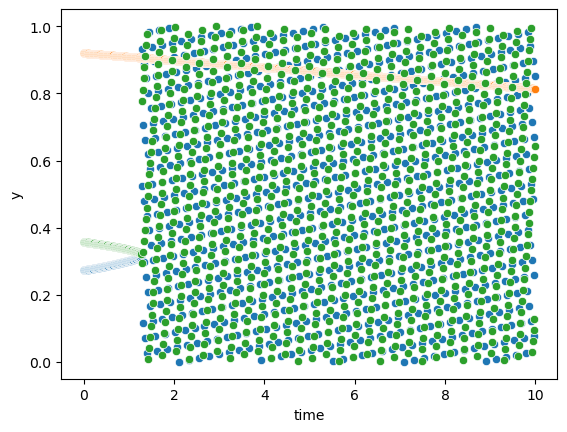

In [15]:
plt.figure()
DF[0]["time"] = DF[0]["time"].apply(float)
DF[0]["y"] = DF[0]["y"].apply(float)
sns.scatterplot(data=DF[0][::1], x="time", y="y")

DF[1]["time"] = DF[1]["time"].apply(float)
DF[1]["y"] = DF[1]["y"].apply(float)
sns.scatterplot(data=DF[1][::1], x="time", y="y")


DF[2]["time"] = DF[2]["time"].apply(float)
DF[2]["y"] = DF[2]["y"].apply(float)
sns.scatterplot(data=DF[2][::1], x="time", y="y")